<a href="https://colab.research.google.com/github/pinilDissanayaka/Bean-Leaf-Lesions-Classification/blob/main/Notebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [10]:
! kaggle datasets download marquis03/bean-leaf-lesions-classification

 94% 145M/155M [00:01<00:00, 119MB/s]
100% 155M/155M [00:01<00:00, 148MB/s]


In [11]:
! unzip /content/bean-leaf-lesions-classification.zip

Archive:  /content/bean-leaf-lesions-classification.zip
  inflating: classname.txt           
  inflating: train.csv               
  inflating: train/angular_leaf_spot/angular_leaf_spot_train.0.jpg  
  inflating: train/angular_leaf_spot/angular_leaf_spot_train.1.jpg  
  inflating: train/angular_leaf_spot/angular_leaf_spot_train.10.jpg  
  inflating: train/angular_leaf_spot/angular_leaf_spot_train.100.jpg  
  inflating: train/angular_leaf_spot/angular_leaf_spot_train.101.jpg  
  inflating: train/angular_leaf_spot/angular_leaf_spot_train.102.jpg  
  inflating: train/angular_leaf_spot/angular_leaf_spot_train.103.jpg  
  inflating: train/angular_leaf_spot/angular_leaf_spot_train.104.jpg  
  inflating: train/angular_leaf_spot/angular_leaf_spot_train.105.jpg  
  inflating: train/angular_leaf_spot/angular_leaf_spot_train.106.jpg  
  inflating: train/angular_leaf_spot/angular_leaf_spot_train.107.jpg  
  inflating: train/angular_leaf_spot/angular_leaf_spot_train.108.jpg  
  inflating: train/an

In [12]:
!pip install livelossplot
!pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 14.9 MB/s eta 0:00:00


In [13]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from livelossplot import PlotLossesKerasTF
import visualkeras
from glob import glob


import warnings
warnings.filterwarnings(action = 'ignore')

In [14]:
TRAIN_DIR = '/content/train.csv'
VALID_DIR = '/content/val.csv'

In [23]:
train_df = pd.read_csv(TRAIN_DIR)
valid_df = pd.read_csv(VALID_DIR)

In [16]:
train_df.head()

,image:FILE,category
0,train/healthy/healthy_train.98.jpg,0
1,train/healthy/healthy_train.148.jpg,0
2,train/healthy/healthy_train.306.jpg,0
3,train/healthy/healthy_train.305.jpg,0
4,train/healthy/healthy_train.40.jpg,0


In [19]:
train_df.tail()

,image:FILE,category
1029,train/bean_rust/bean_rust_train.29.jpg,2
1030,train/bean_rust/bean_rust_train.311.jpg,2
1031,train/bean_rust/bean_rust_train.336.jpg,2
1032,train/bean_rust/bean_rust_train.329.jpg,2
1033,train/bean_rust/bean_rust_train.186.jpg,2


In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image:FILE  1034 non-null   object
 1   category    1034 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 16.3+ KB


In [22]:
train_df.duplicated().sum()

0

In [21]:
train_df.isnull().sum()

image:FILE    0
category      0
dtype: int64

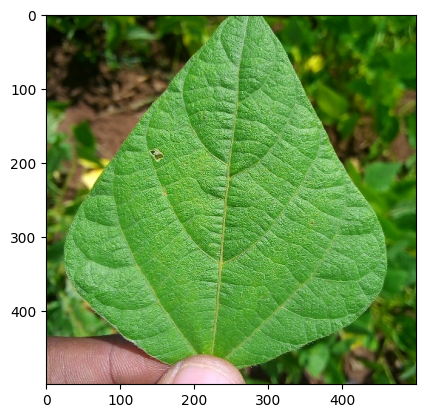

In [18]:
plt.imshow(plt.imread('train/healthy/healthy_train.98.jpg'))